# Decision Tree In Stock Market Price Prediction

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn import metrics

###  Store The Data Into A Data Frame

In [2]:
#Load The Data
df = pd.read_csv('QAN.AX.csv')
df= df.dropna()
df=df.rename(columns={"Open": "Open Price", "High": "High Price", "Low": "Low Price", "Close": "Close Price", "Adj Close": "Adj Close Price"})
df.head(6)

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2005-01-04,3.94036,3.97231,3.92971,3.94036,2.569208,4556107
1,2005-01-05,3.90841,3.92971,3.89776,3.89776,2.541431,3790749
2,2005-01-06,3.88711,3.91906,3.87646,3.91906,2.555320,8103344
3,2005-01-07,3.92971,3.95101,3.90841,3.95101,2.576152,3692280
4,2005-01-10,3.91906,3.95101,3.91906,3.92971,2.562263,3415499
5,2005-01-11,3.95101,3.97231,3.91906,3.92971,2.562263,5434922


In [3]:
df.tail(6)

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
3933,2020-07-24,3.69,3.72,3.62,3.64,3.64,6075858
3934,2020-07-27,3.64,3.68,3.59,3.68,3.68,5816771
3935,2020-07-28,3.64,3.68,3.58,3.59,3.59,5844107
3936,2020-07-29,3.58,3.63,3.47,3.48,3.48,14824612
3937,2020-07-30,3.46,3.47,3.35,3.36,3.36,18258048
3938,2020-07-31,3.34,3.35,3.20,3.23,3.23,23172628


### Print The Number Of Trading Days

In [4]:
number_of_rows=df.shape[0]

### Visualize The Close Price Data

 


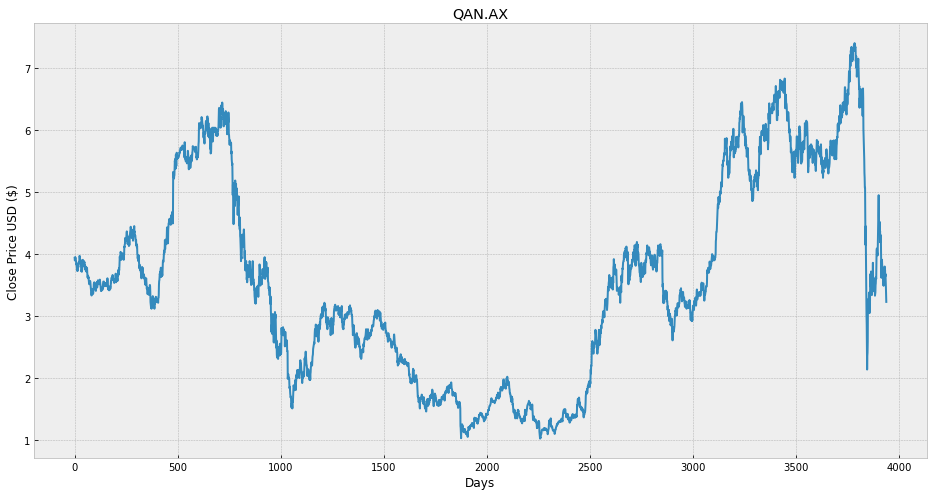

In [5]:
plt.figure(figsize=(16,8))
plt.title('QAN.AX')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

### Only Pick Close Price

In [6]:
df = df[['Close Price']]


### Print The Data

In [7]:
df

,Close Price
0,3.94036
1,3.89776
2,3.91906
3,3.95101
4,3.92971
...,...
3934,3.68000
3935,3.59000
3936,3.48000
3937,3.36000


### Create a new column that represent the true value of the prediction

In [8]:
df['True_Prediction'] = df[['Close Price']].shift(-1)
df= df.dropna()
df

,Close Price,True_Prediction
0,3.94036,3.89776
1,3.89776,3.91906
2,3.91906,3.95101
3,3.95101,3.92971
4,3.92971,3.92971
...,...,...
3933,3.64000,3.68000
3934,3.68000,3.59000
3935,3.59000,3.48000
3936,3.48000,3.36000


#### Check whether there is a null value in the dataframe

In [9]:
df[df.isna().any(axis=1)]

,Close Price,True_Prediction


### Create an array that contains all values in 'Close' column

In [10]:
X= np.array(df.drop(['True_Prediction'], 1))

### Create an array that contains all values in 'True_Prediction' column

In [11]:
y= np.array(df['True_Prediction'])

### Split The Data Ramdomly Into 70% Training  and 30% Testing

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [13]:
df

,Close Price,True_Prediction
0,3.94036,3.89776
1,3.89776,3.91906
2,3.91906,3.95101
3,3.95101,3.92971
4,3.92971,3.92971
...,...,...
3933,3.64000,3.68000
3934,3.68000,3.59000
3935,3.59000,3.48000
3936,3.48000,3.36000


### Train the model with training data

In [14]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

**store predicted value to 'predictions'**

In [15]:
predictions= tree.predict(x_test)


### Print the performance measurements

In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('R2: ', metrics.r2_score(y_test, predictions))


Mean Squared Error: 0.0087183715900561
Mean Absolute Error: 0.06530356461342755
R2:  0.9967864550288561


## Test the model by fitting it with time series order
* Create a test data that contains the last 30% of the whole data set
* Create a actual value for each test data
* Process all data into the training ready data 

In [17]:
testing = df[int(len(df)*0.7):]
Actual_value= np.array(df['True_Prediction'][int(len(df)*0.7):])

testing = np.array(testing.drop(['True_Prediction'], 1))
Actual_value= np.array(df['True_Prediction'][int(len(df)*0.7):])


**Generates the prediction based on 'testing'**

In [18]:
testing_predictions= tree.predict(testing)

## Display the predictions from the model in time series graph

**Note: the graph starts from the first 65% of the data**

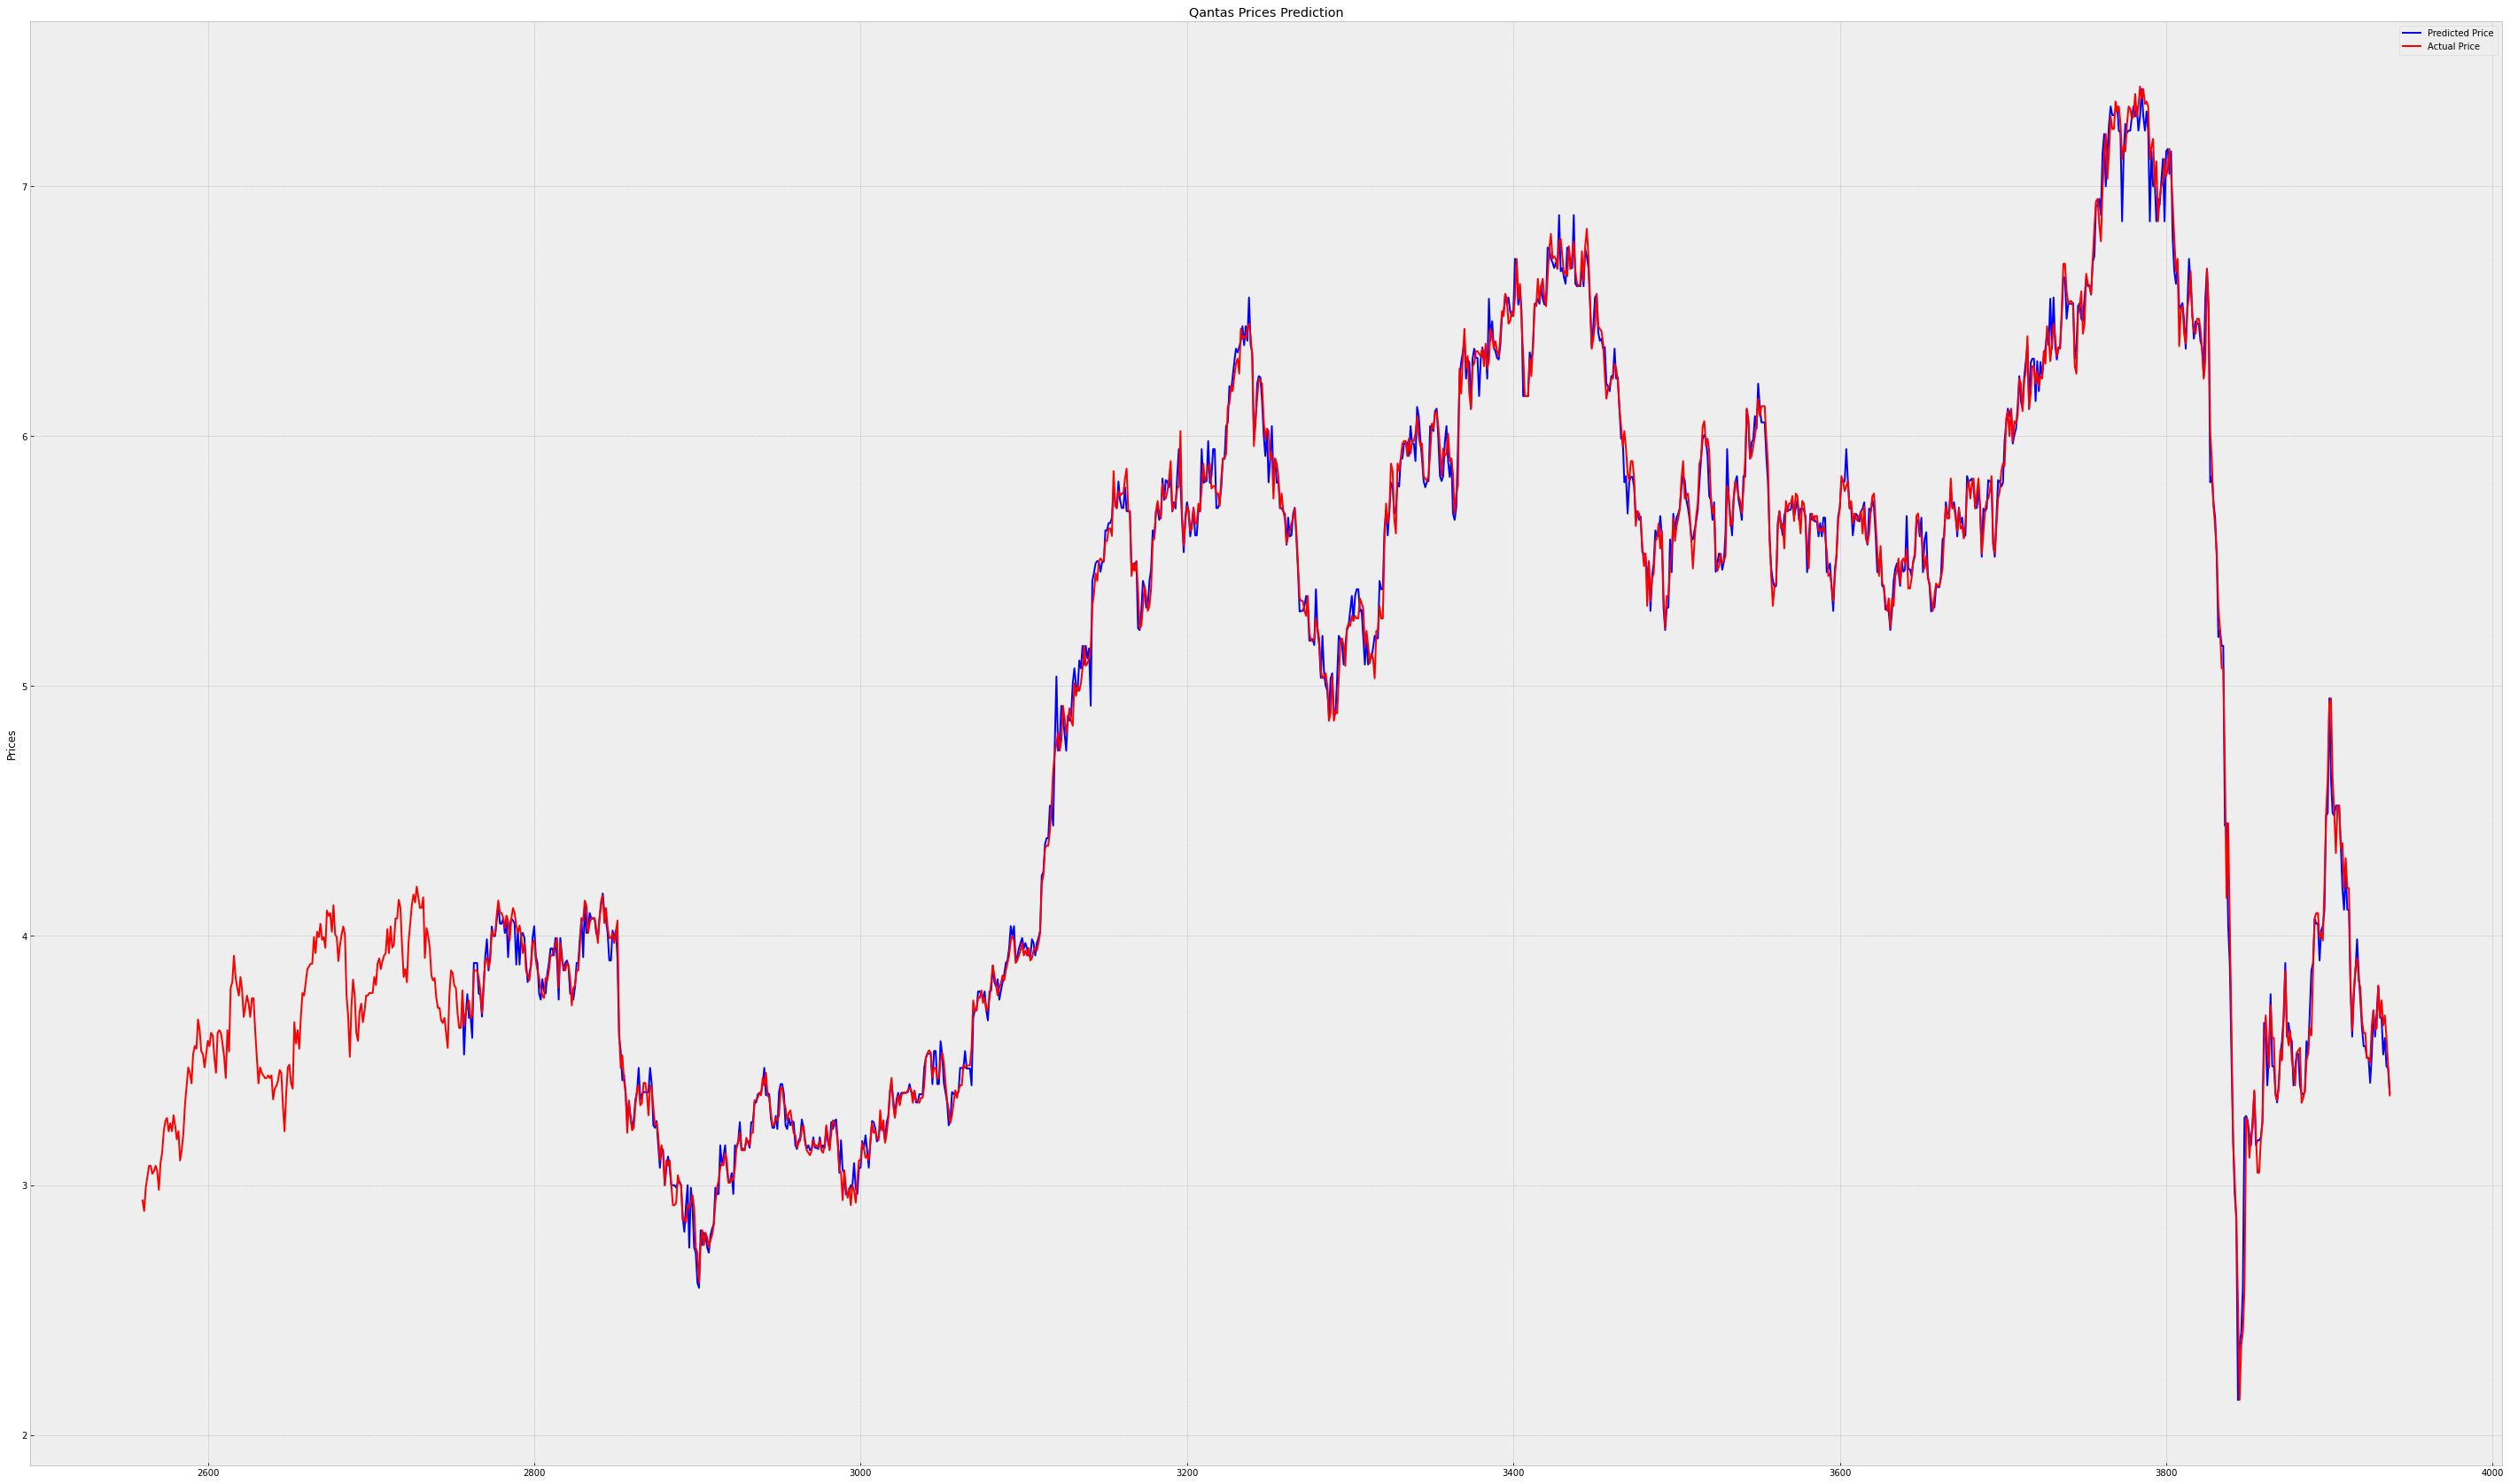

In [19]:
plt.figure(figsize=(50, 30))
test_set_range = df[int(len(df)*0.7):].index
all_range= df.index
plt.plot(test_set_range, testing_predictions, color='blue',label='Predicted Price')
plt.plot(all_range[round(0.65*len(all_range)):], df['Close Price'][round(0.65*len(all_range)):].values, color='red', label='Actual Price')
plt.title('Qantas Prices Prediction')
plt.ylabel('Prices')
plt.legend()
plt.show()

### Print the performance measurements

In [20]:
print('Mean Squared Error:', metrics.mean_squared_error(Actual_value, testing_predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(Actual_value, testing_predictions))
print('R2: ', metrics.r2_score(Actual_value, testing_predictions))

Mean Squared Error: 0.008301922913814685
Mean Absolute Error: 0.062405557958891085
R2:  0.9948866107341898


# Forcasting 5 days in the future

**Create a dataframe for forcasting the price in 5 days**

In [21]:
future= pd.read_csv('QAN.AX.csv')

In [22]:
future = future.dropna()

In [23]:
future= future[['Date','Close']][-15:]

In [24]:
future

,Date,Close
3924,2020-07-13,3.51
3925,2020-07-14,3.49
3926,2020-07-15,3.64
3927,2020-07-16,3.70
3928,2020-07-17,3.62
3929,2020-07-20,3.63
3930,2020-07-21,3.80
3931,2020-07-22,3.67
3932,2020-07-23,3.74
3933,2020-07-24,3.64


**Set the number of days needs to be predicted and create 5 more rows in the dataframe**

In [25]:
days=5
Predict_1 = {'Date':'2020-08-03', 'Close': np.NAN}
Predict_2 = {'Date':'2020-08-04', 'Close': np.NAN}
Predict_3 = {'Date':'2020-08-05', 'Close': np.NAN}
Predict_4 = {'Date':'2020-08-06', 'Close': np.NAN}
Predict_5 = {'Date':'2020-08-07', 'Close': np.NAN}

In [26]:
future = future.append([Predict_1,Predict_2,Predict_3,Predict_4,Predict_5], ignore_index=True)

In [27]:
future

,Date,Close
0,2020-07-13,3.51
1,2020-07-14,3.49
2,2020-07-15,3.64
3,2020-07-16,3.70
4,2020-07-17,3.62
5,2020-07-20,3.63
6,2020-07-21,3.80
7,2020-07-22,3.67
8,2020-07-23,3.74
9,2020-07-24,3.64


**Create a variable that contains the predictions for the next 5 days**

In [28]:
predict_set = np.array(future.drop(['Date'], 1))[-6:]

In [29]:
predict_set

array([[3.23],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])

**Use the model 'tree' to predict**

In [30]:
for i in range(0,days):
    
    a= predict_set[i]
    a=np.reshape(a, (1,1)) 
    value= tree.predict(a)
    predict_set[i+1]= value

    

**Print the predictions**

In [31]:
predict_set= predict_set[1:]
predict_set

array([[3.26333333],
       [3.225     ],
       [3.2098    ],
       [3.25285714],
       [3.25714286]])

**Assign the predictions value into the dataframe by replacing NAN variables**

In [32]:
future.loc[future['Close'].isnull(), 'Close'] = predict_set

In [33]:
future

,Date,Close
0,2020-07-13,3.510000
1,2020-07-14,3.490000
2,2020-07-15,3.640000
3,2020-07-16,3.700000
4,2020-07-17,3.620000
5,2020-07-20,3.630000
6,2020-07-21,3.800000
7,2020-07-22,3.670000
8,2020-07-23,3.740000
9,2020-07-24,3.640000


### Visualize the forcasting result

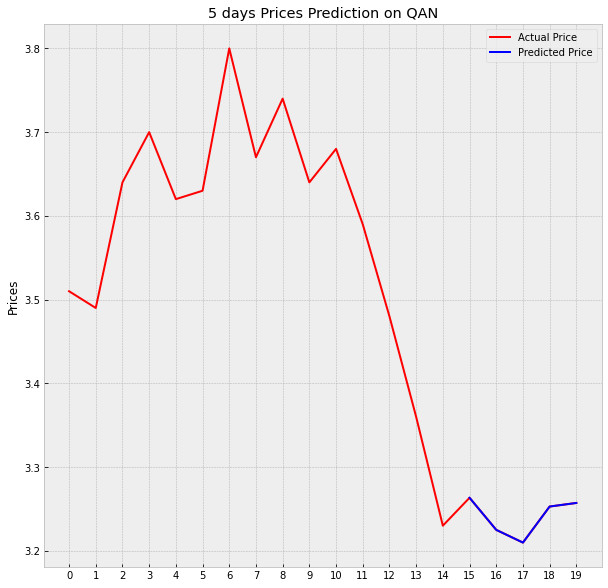

In [34]:
plt.figure(figsize=(10, 10))
predict_set_range = future[-5:].index
all_range= future.index

plt.plot(all_range, future['Close'].values, color='red', label='Actual Price')
plt.plot(predict_set_range, predict_set, color='blue',label='Predicted Price')
plt.title('5 days Prices Prediction on QAN')
plt.ylabel('Prices')
plt.xticks(range(0, 20))
plt.legend()
plt.show()

